# Plesio-Geostrophy Model - Spectral Expansions

In [1]:
import numpy as np
from scipy import special as specfun
import matplotlib.pyplot as plt

## Regularity for equatorial magnetic field

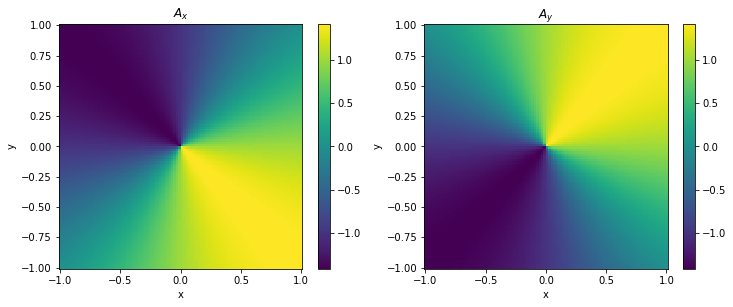

In [14]:
As = 1
Ap = 1

x_array = np.linspace(-1, 1, num=100)
y_array = np.linspace(-1, 1, num=100)
X, Y = np.meshgrid(x_array, y_array)

R = np.sqrt(X**2 + Y**2)
R[np.isclose(R, 0)] = 1
cos = X/R
sin = Y/R

Ax = cos*As - sin*Ap
Ay = sin*As + cos*Ap

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4.5))

ax = axes[0]
cm = ax.pcolormesh(X, Y, Ax)
plt.colorbar(cm, ax=ax)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(r"$A_x$")

ax = axes[1]
cm = ax.pcolormesh(X, Y, Ay)
plt.colorbar(cm, ax=ax)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(r"$A_y$")

plt.savefig("./presentation/elements/singular_field.png", format="png", dpi=150, bbox_inches="tight")
plt.show()

In [8]:
X

array([[-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       ...,
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ]])

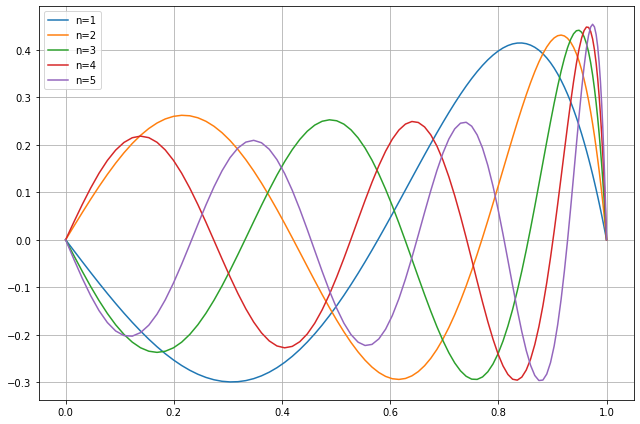

In [2]:
m_mode = 2

alpha = 2
beta = m_mode - 3/2
leading_power = np.abs(np.abs(m_mode) - 1)
n_array = np.arange(1, 6)

xi, _ = specfun.roots_jacobi(100, alpha, beta)
xi = np.r_[-1, xi, 1]
s = np.sqrt((1 + xi)/2)

basis_array = np.zeros((n_array.size, s.size))
for i, n in enumerate(n_array):
    basis_array[i, :] = specfun.jacobi(n, alpha, beta)(2*s**2 - 1)
s_basis_array = s**leading_power*(1 - s**2)*basis_array

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9.0, 6.0), layout="tight")

# ax = axes[0]
# for i, n in enumerate(n_array):
#     ax.plot(s, basis_array[i], label="n={:d}".format(n))
# ax.legend()
# ax.grid()

for i, n in enumerate(n_array):
    ax.plot(s, s_basis_array[i], label="n={:d}".format(n))
ax.legend()
ax.grid()

plt.show()

In [7]:
import sympy
from sympy import diff
from pg_model.pgeostrophy_utils import pgeostrophy_eqns as pgeq

In [26]:
# sympy.Eq(diff(pgeq.mss, pgeq.t), pgeq.evo_dbp_dz_e)
pgeq.Le_p_lin

B_{e\phi, z}^0(s, \phi, t)*b_{ez}(s, \phi, t) + B_{es}^0(s, \phi, t)*Derivative(b_{e\phi}(s, \phi, t), s) + B_{ez}^0(s, \phi, t)*b_{e\phi, z}(s, \phi, t) + b_{es}(s, \phi, t)*Derivative(B_{e\phi}^0(s, \phi, t), s) + B_{e\phi}^0(s, \phi, t)*b_{es}(s, \phi, t)/s + B_{e\phi}^0(s, \phi, t)*Derivative(b_{e\phi}(s, \phi, t), \phi)/s + B_{es}^0(s, \phi, t)*b_{e\phi}(s, \phi, t)/s + b_{e\phi}(s, \phi, t)*Derivative(B_{e\phi}^0(s, \phi, t), \phi)/s